<h1 style="margin:auto;width:50%;padding:30px;">Исходное изображение</h1>

<img src="res/1.jpg" width="500">

In [2]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

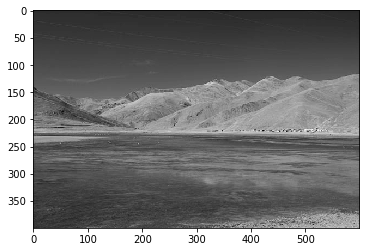

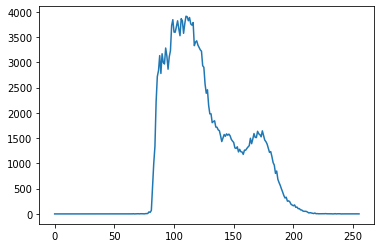

In [58]:
img = cv.imread('res/1.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

hist = cv.calcHist([gray],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

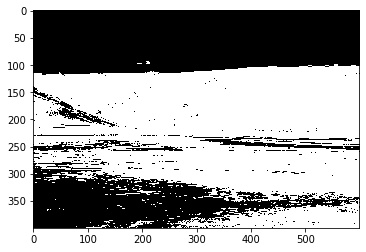

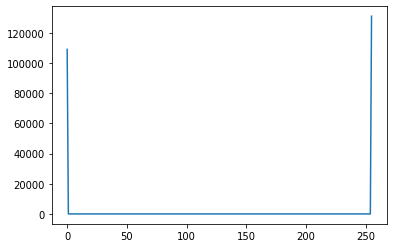

In [65]:
ret, threshold_image = cv.threshold(gray, 115, 255, cv.THRESH_BINARY)

plt.imshow(threshold_image, cmap='gray')
plt.show()
threshold_hist = cv.calcHist([threshold_image],[0],None,[256],[0,256])
plt.plot(threshold_hist)
plt.show()

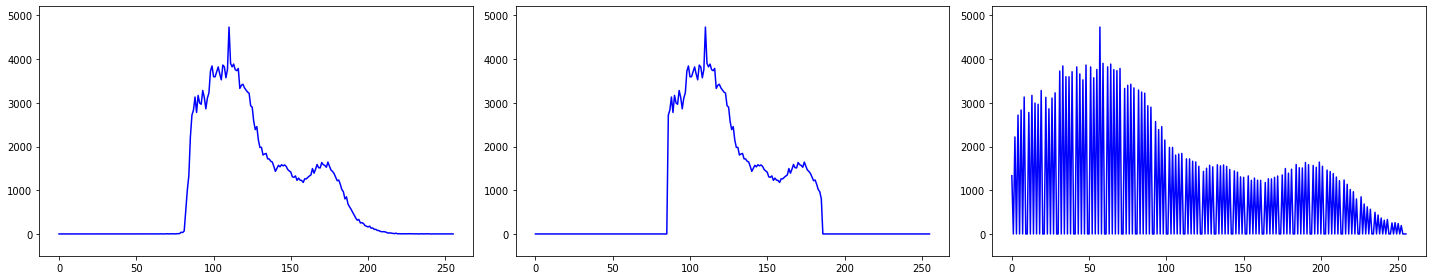

In [106]:
def cutHistogram(hist, per=5) :
    new_hist = np.copy(hist)
    margin = sum(hist) * per / 100
    
    left_m = 0; right_m = 256
    left_v = 0; right_v = 0
    while left_v + right_v < margin :
        if new_hist[right_m - 1] + right_v > new_hist[left_m + 1] + left_v :
            left_v += hist[left_m + 1]
            new_hist[left_m + 1] = 0 
            left_m += 1
        else :
            right_v += hist[right_m - 1]
            new_hist[right_m - 1] = 0 
            right_m -= 1
            
    return new_hist


def linearStretching(hist) :
    new_hist = np.zeros(shape=(256,1))
    map_changes = np.zeros(shape=(256,1))
    
    a = 0; b = 256
    
    for item in hist :
        if item != 0 :
            break
        a += 1
    for item in reversed(hist) :
        if item != 0 :
            break
        b -= 1
    
    for i in range(a,b)  :
        map_changes[i] = (int)((i - a) * 255 / (b - a) + 0)
        new_hist[(int)((i - a) * 255 / (b - a) + 0)] = hist[i]
            
    return (new_hist, map_changes)


def transformHist(hist, per=5) :
    return linearStretching(cutHistogram(hist, per))
    

    
liner_hist = transformHist(hist,1)[0]
    
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
axes[0].plot(hist, color = 'b')
axes[1].plot(cutHistogram(hist),color = 'b')
axes[2].plot(liner_hist,color = 'b')
max_v = max(hist); max_v += max_v * 0.1
axes[0].set_ylim((-500,max_v)); axes[1].set_ylim((-500,max_v)); axes[2].set_ylim((-500,max_v))
fig.tight_layout()

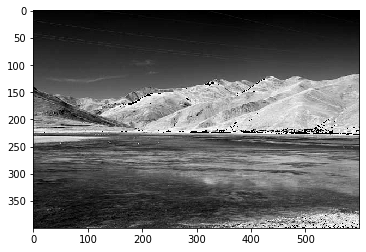

In [67]:
def mapHistOnImage(img, mapColor) :
    new_img = img.copy()
    for i in range(new_img.shape[0]) :
        for j in range(new_img.shape[1]) :
            new_img[i][j] = mapColor[new_img[i][j]]
    return new_img


plt.imshow(mapHistOnImage(gray, transformHist(hist,1)[1]), cmap='gray')
plt.show()

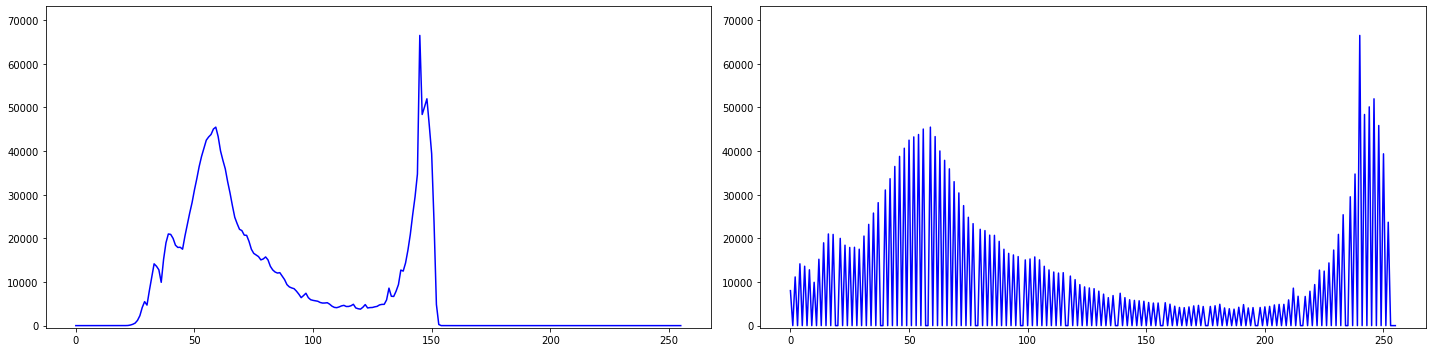

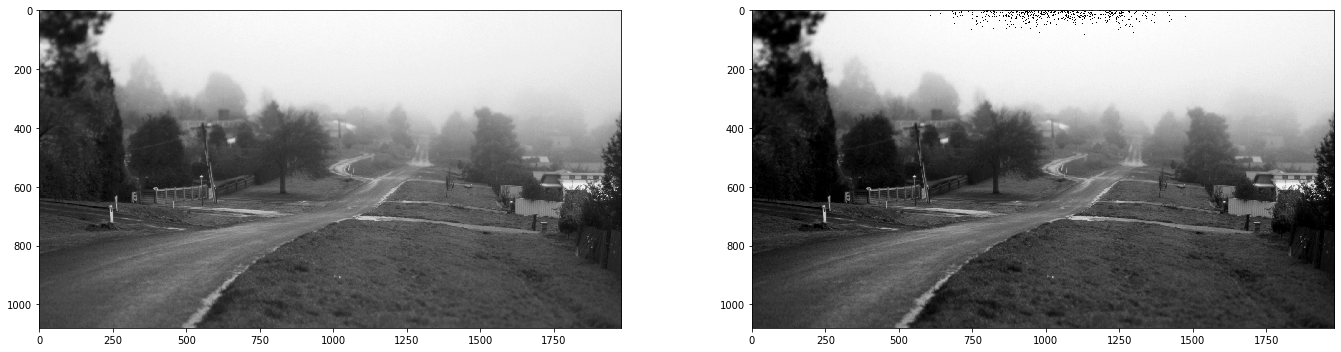

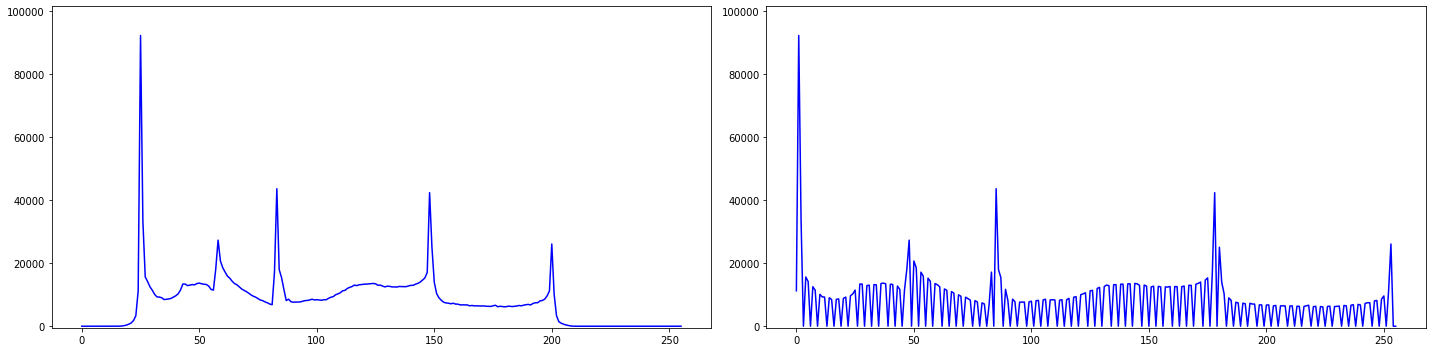

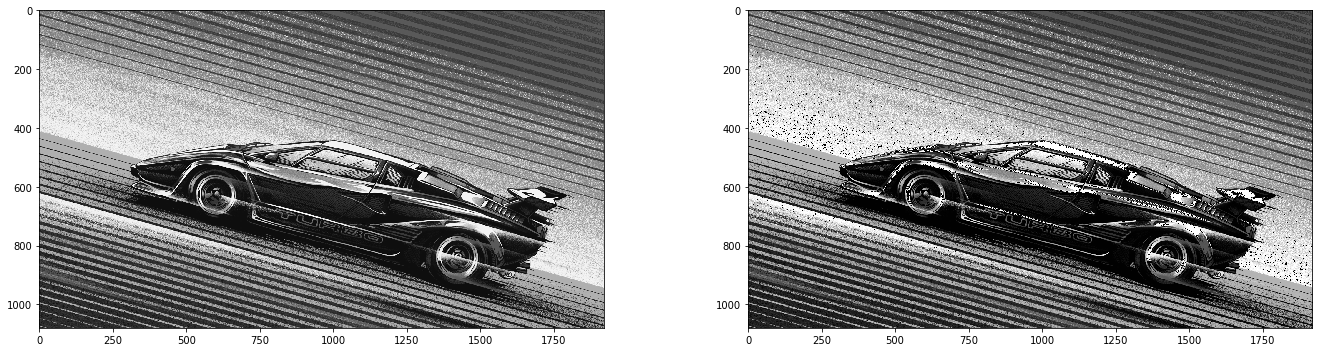

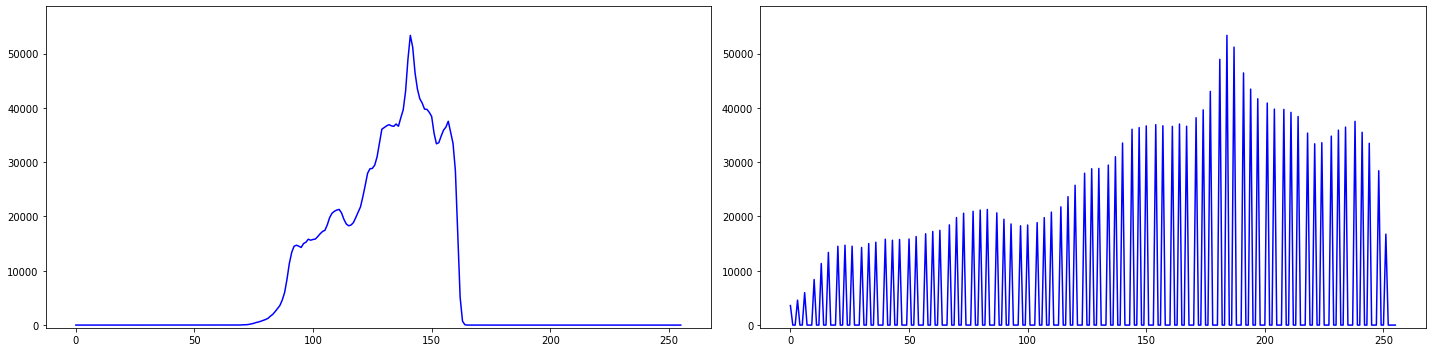

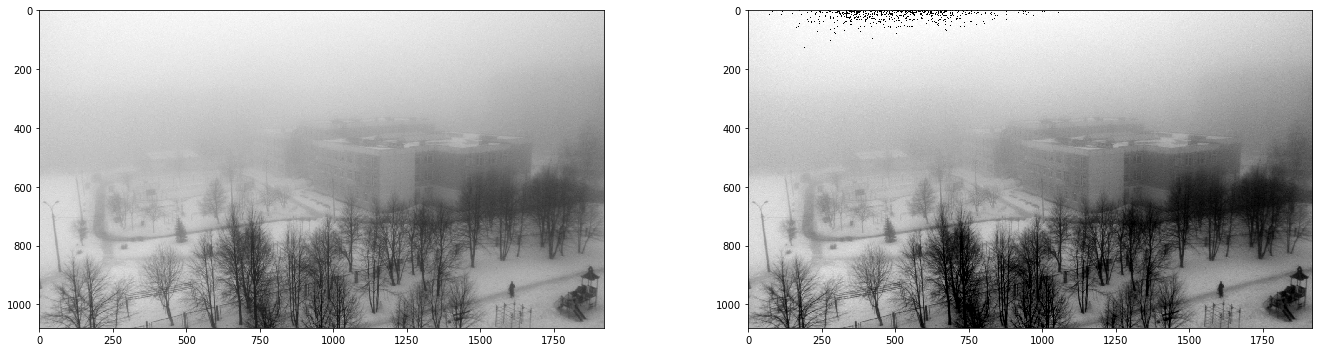

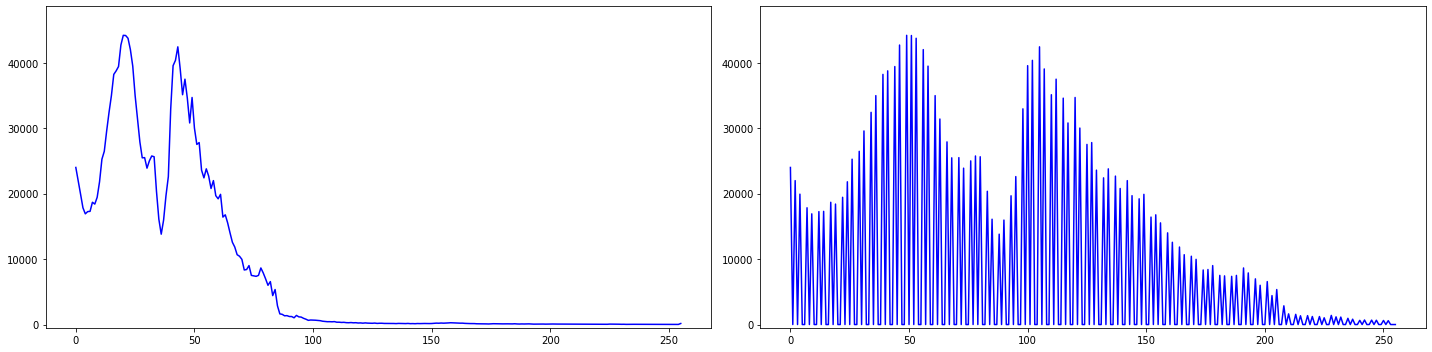

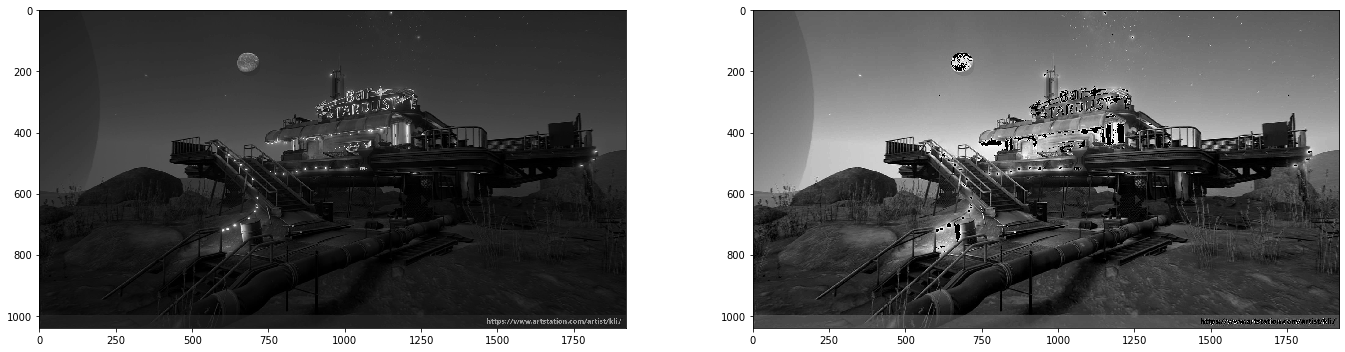

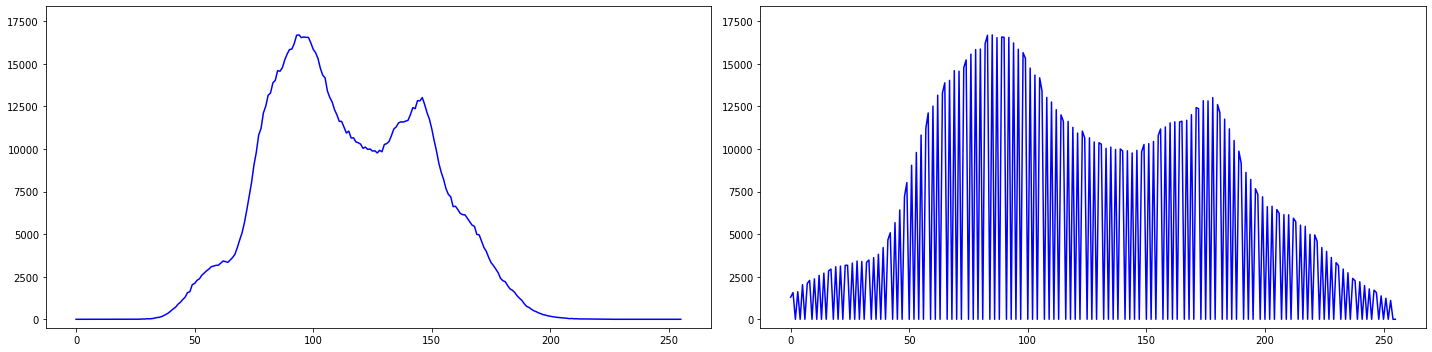

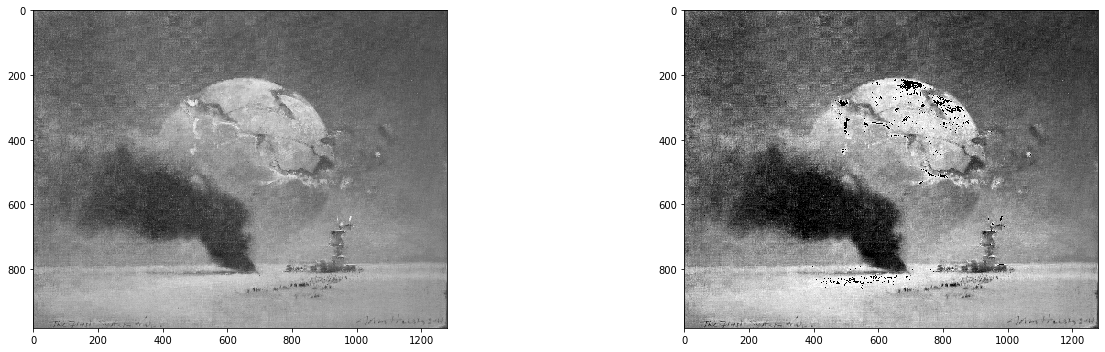

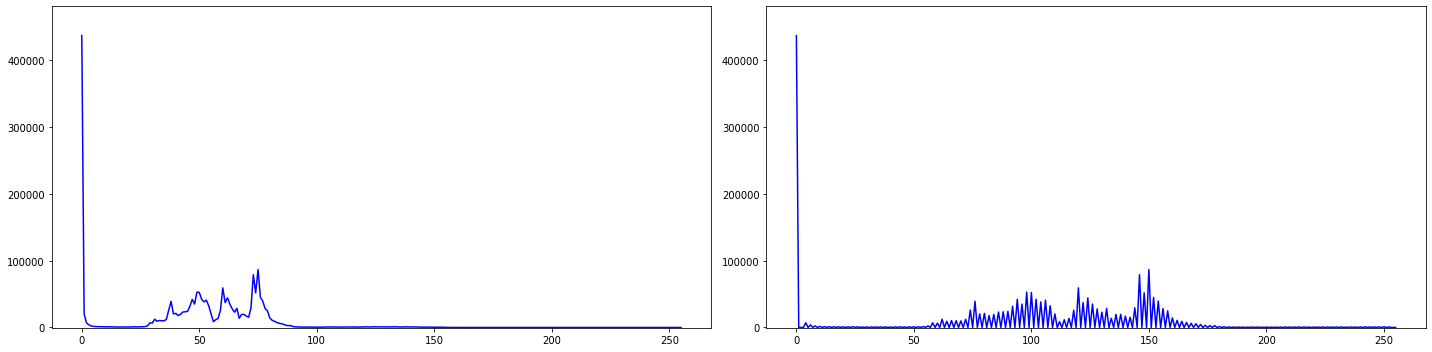

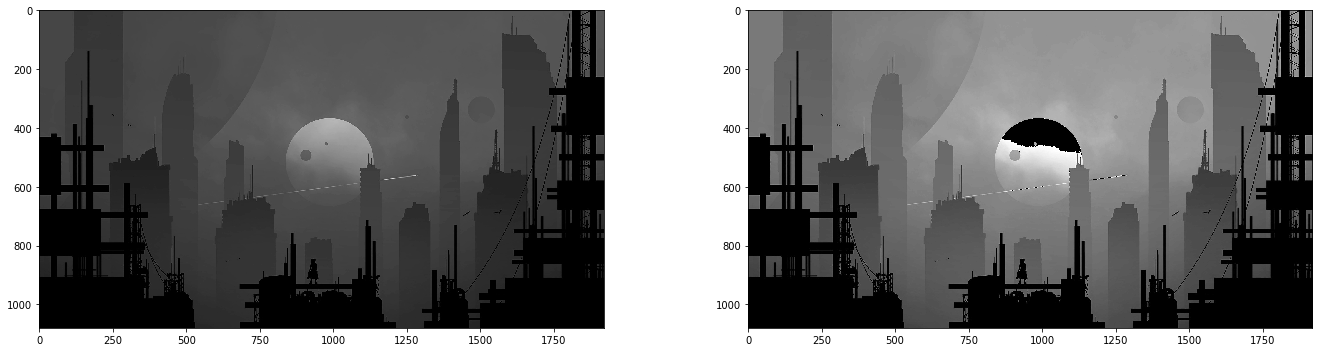

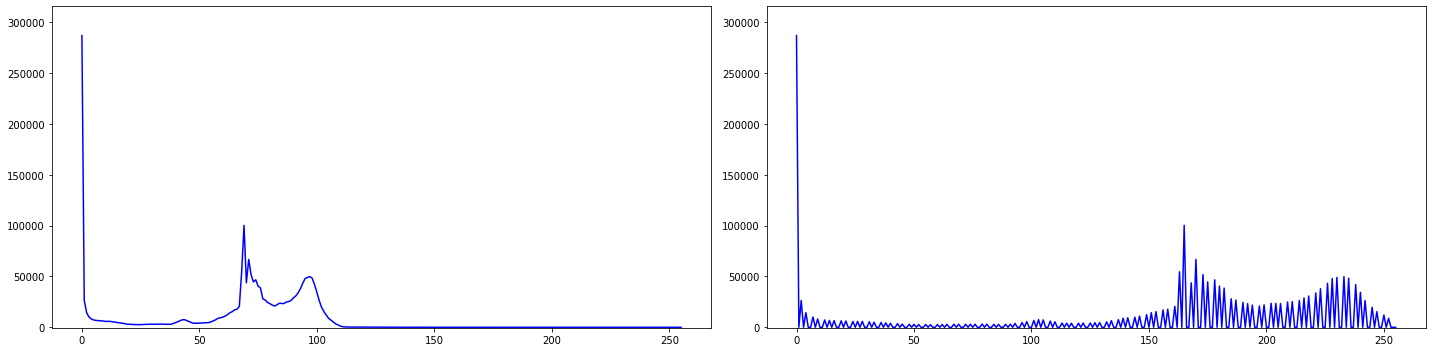

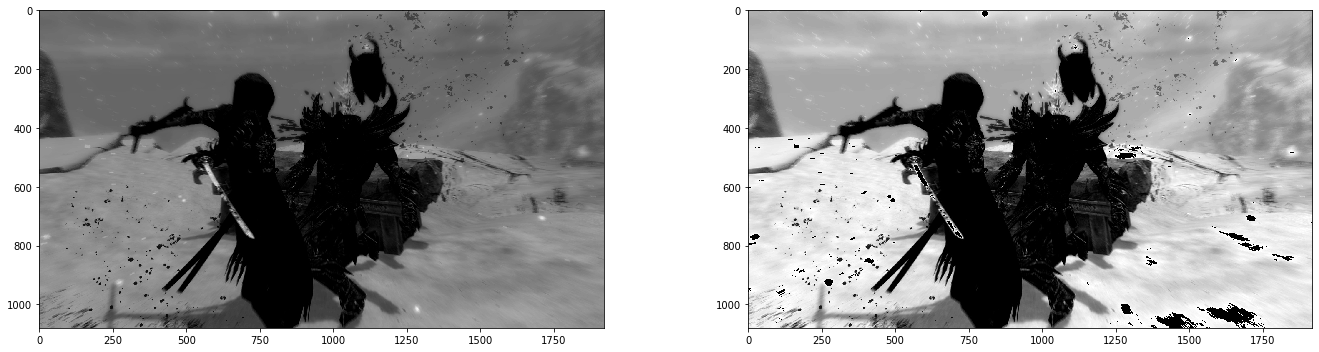

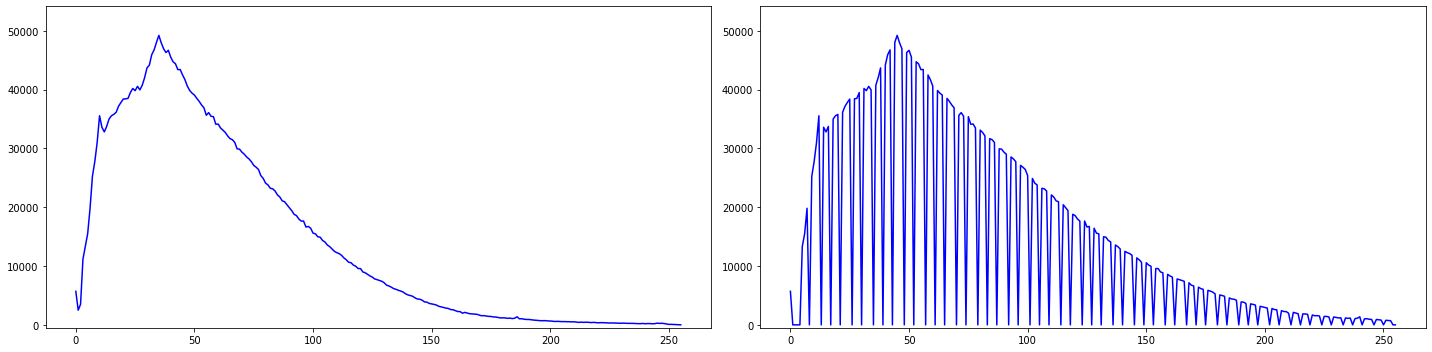

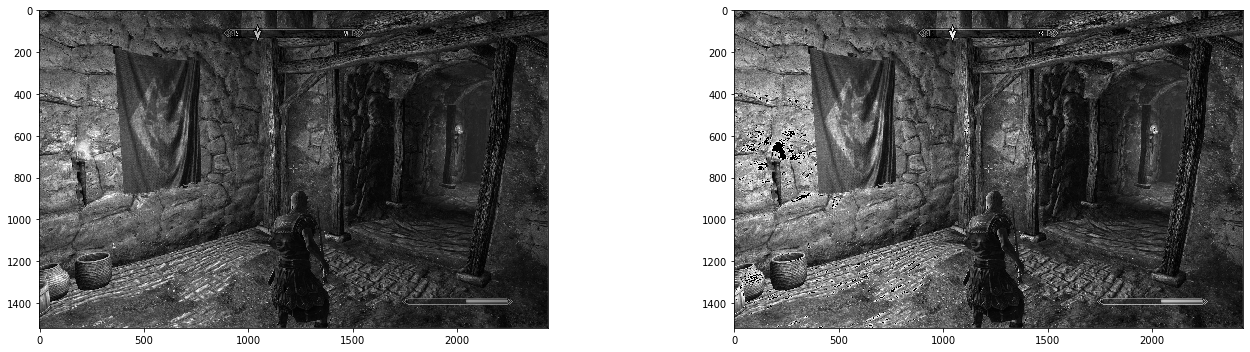

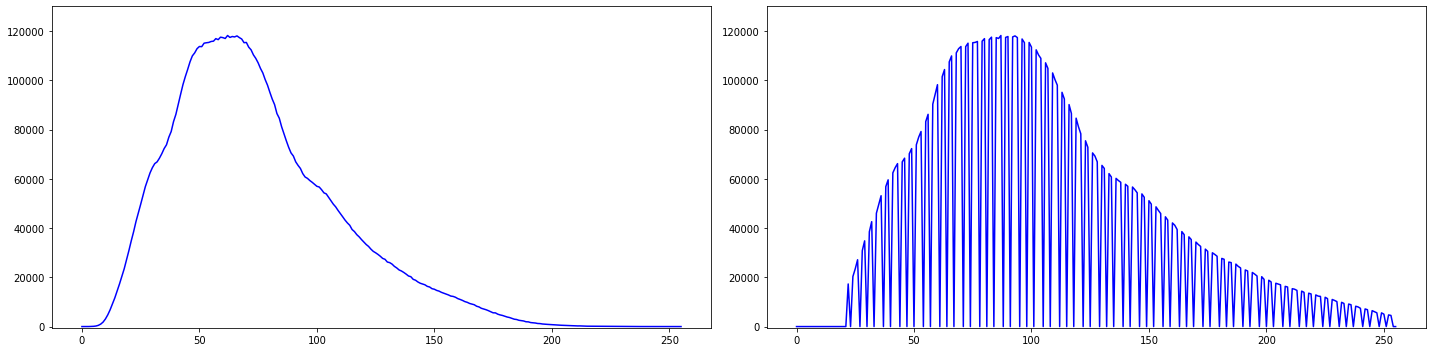

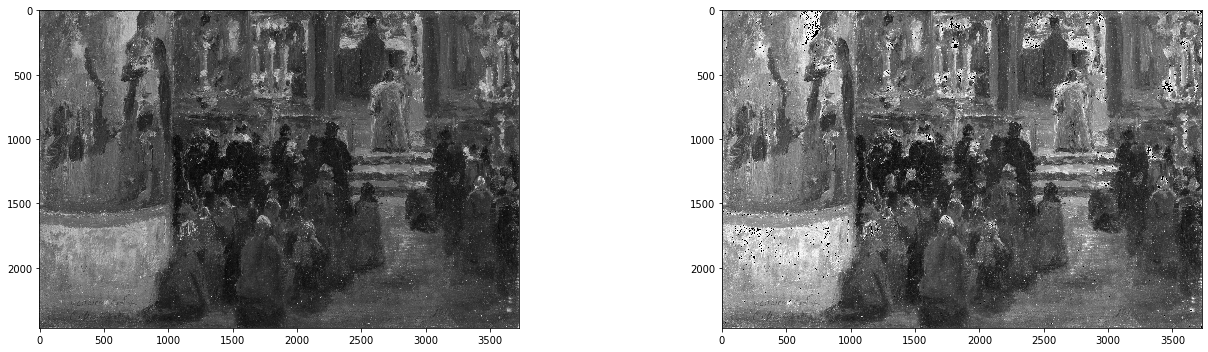

In [74]:
per_cut = 1

img_names = ['res/2.jpg', 'res/3.png','res/4.jpg',
             'res/5.jpg', 'res/6.jpg', 'res/7.jpg',
             'res/8.jpg', 'res/9.png', 'res/10.jpg']

for img_name in img_names :
    img = cv.imread(img_name,0)
    hist = cv.calcHist([img],[0],None,[256],[0,256])
    
    newHist, colorMap = transformHist(hist, per_cut)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    axes[0].plot(hist, color = 'b')
    axes[1].plot(newHist,color = 'b')
    max_v = max(hist); max_v += max_v * 0.1
    axes[0].set_ylim((-500,max_v)); axes[1].set_ylim((-500,max_v))
    fig.tight_layout()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    axes[0].imshow(img, cmap='gray') 
    axes[1].imshow(mapHistOnImage(img, colorMap), cmap='gray')
    fig.tight_layout()


перепробавано около 150 изображени, представлены лучшие результаты
per был взят 0, 1 , 5  в итоге оптимальным оказалось значение 1

помогает, если изображение низкоконтрастное

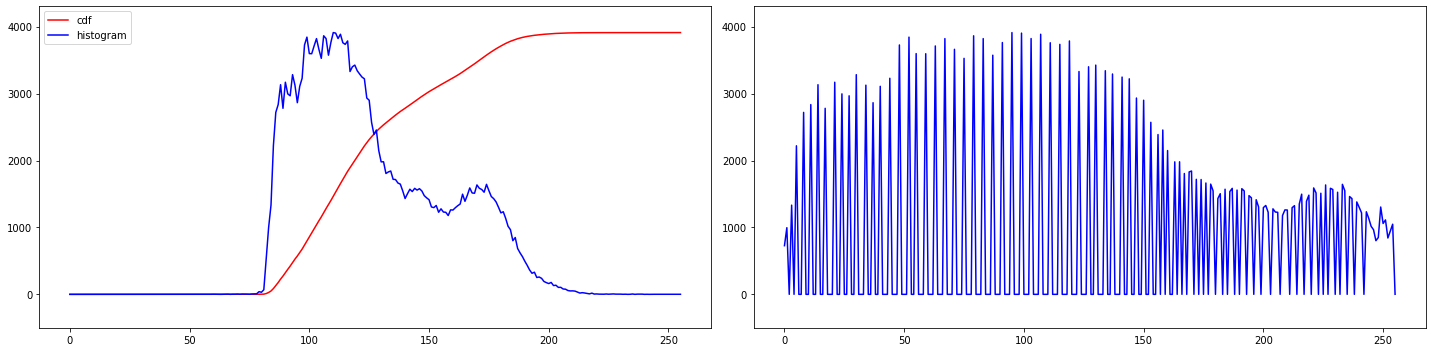

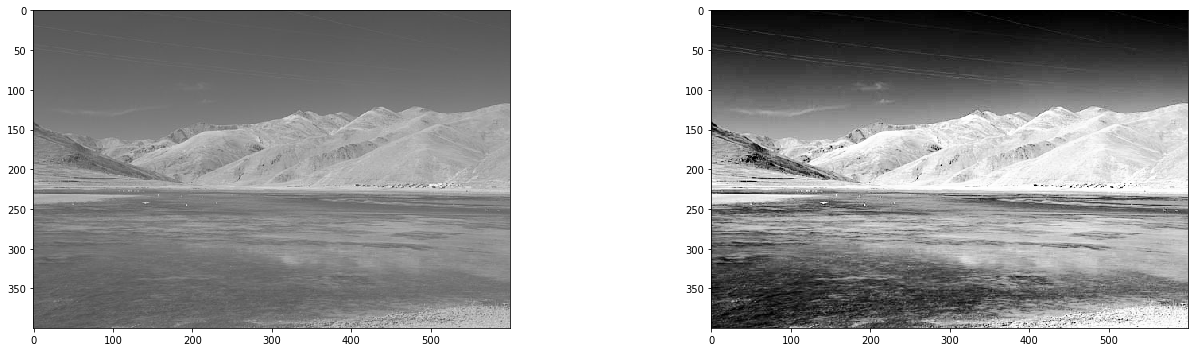

In [109]:
img = cv.imread('res/1.jpg',0)
hist = cv.calcHist([img],[0],None,[256],[0,256])

cdf = hist.cumsum()

cdf_normalized = cdf * hist.max() / cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

equal_hist = cv.calcHist([img2],[0],None,[256],[0,256])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].plot(cdf_normalized, color = 'r')
axes[0].plot(hist, color = 'b')
axes[0].legend(('cdf','histogram'), loc = 'upper left')
axes[1].plot(equal_hist,color = 'b')
max_v = max(hist); max_v += max_v * 0.1
axes[0].set_ylim((-500,max_v)); axes[1].set_ylim((-500,max_v))
fig.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].imshow(img)
axes[1].imshow(img2)
fig.tight_layout()

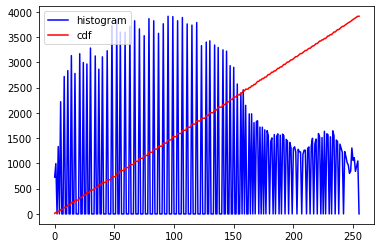

In [114]:
cdf = equal_hist.cumsum()
cdf_normalized = cdf * equal_hist.max() / cdf.max()

plt.plot(equal_hist, color = 'b')
plt.plot(cdf_normalized, color = 'r')
plt.legend(('histogram','cdf'), loc = 'upper left')
plt.show()

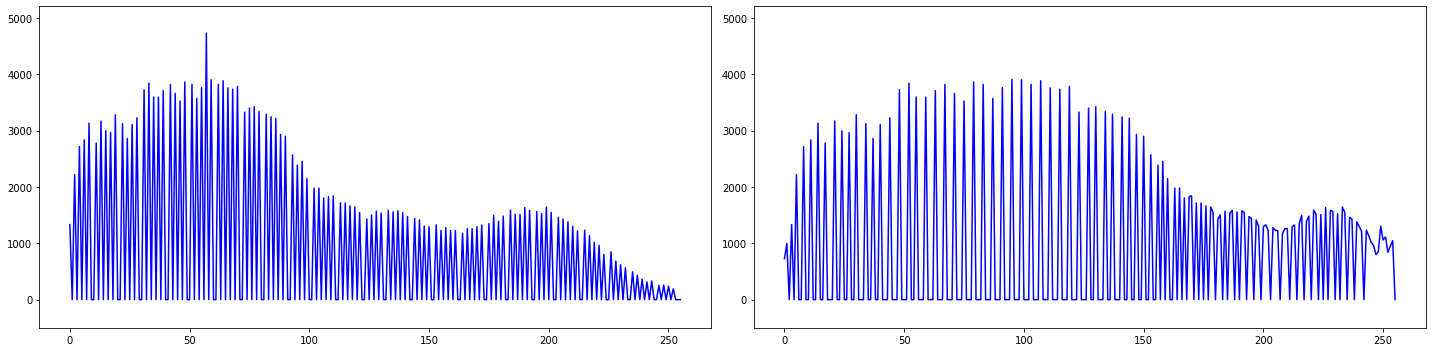

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].plot(liner_hist, color = 'b')
axes[1].plot(equal_hist,color = 'b')
max_v = max(liner_hist); max_v += max_v * 0.1
axes[0].set_ylim((-500,max_v)); axes[1].set_ylim((-500,max_v))
fig.tight_layout()